<a href="https://colab.research.google.com/github/DaviHorner/1-Palestra-do-Grupo-de-PLN-IA-WordEmbeddings/blob/main/Tutorial_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Word Embeddings

## Essa é a primeira palestra do grupo de PLN-IA 

###  Divisão: 
#### **Teoria**
#### **Dúvidas**
#### **Pratica**





# Introdução

PLN - Processo de Linguagem Natural

Análise de textos  Ex. Analise de sentimentos  





# O que é Word Embeddings

Analise semântica:

O que essas palavras tem em comum? 

mulher -> homem

mulher -> rainha

mulher -> rei

homem -> rei

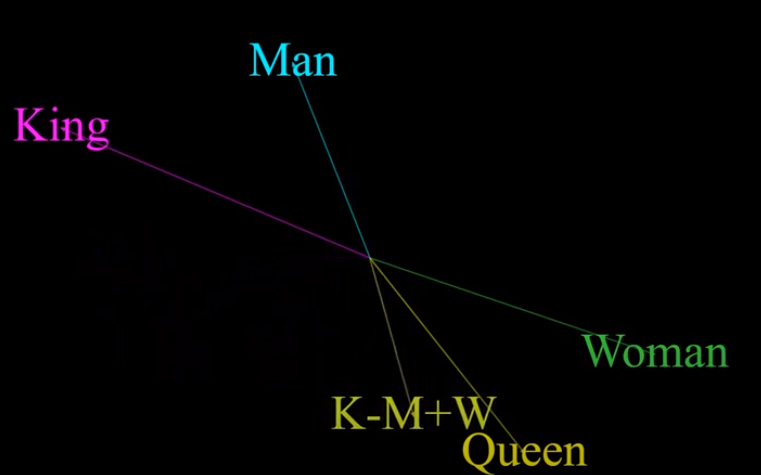

Word Embeddings é a forma utilizada para dar valores numericos a palavras ou frases, a forma de se fazer isso é montar uma matriz Mppn onde p é todas as palavras e n é a quantidade de dimensões da rede neural, por isso antes de montar a matriz e bom fazer uma limpeza das palavras, por exemplo artigos e preposições depedendo da situação não é necessária e acaba por contaminando o word embeddings com palavras inúteis . Dai fazendo essa matriz e achando valores referentes a relação das palavras, mas isso tambem depende do tipo de texto que estamos utilizando pois se usarmos um banco de dados do wikipedia para realizar uma analise de sentimentos de crítica  de filmes, não vai dar certo por causa da linguagem ser diferente,por isso que a origem e a lingua do word embeddings é tão importante. 


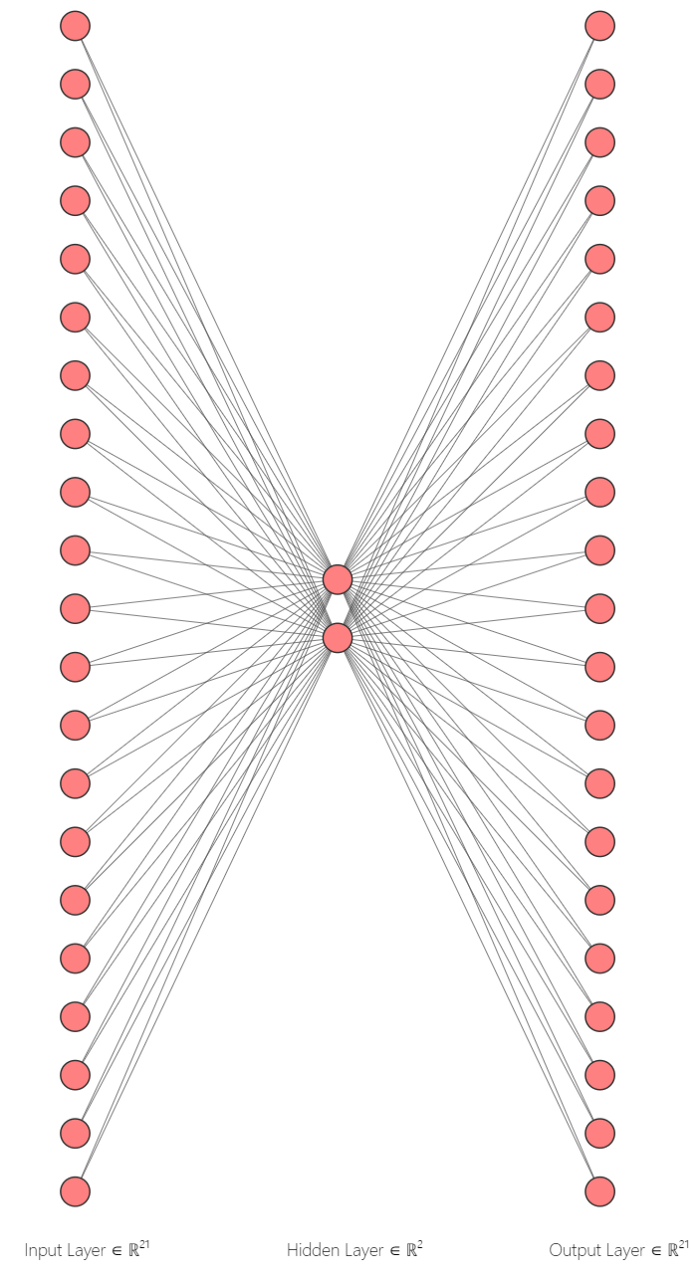

[Video Interessante](https://www.youtube.com/watch?v=gQddtTdmG_8)

[Baixe esse texto para o exemplo e coloque o nome de dom.txt](http://www.gutenberg.org/cache/epub/55752/pg55752.txt)



In [7]:
#Instalação e chamada das bibliotecas
!pip install nltk
!pip install gensim
from google.colab import files
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
nltk.download('punkt')  
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings(action = 'ignore')
#Código para pegar o txt
sample = files.upload()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Saving dom.txt to dom (1).txt


In [8]:
# Filtro para não pegar pontuação 
def filtrar_palavras(sentenca):
  return [word.lower() for word in nltk.word_tokenize(sentenca) if word.isalnum()]

# Separar as palavras em tolkiens
def tokenize(texto):
  return [filtrar_palavras(setenca) for setenca in nltk.sent_tokenize(texto)]  

sentencas = []

data_path = "dom.txt"

with open(data_path, 'r') as f:
  texto = f.read()
  sentencas.extend(tokenize(texto))

# Cria modelo CBOW trabalha de modo que prediz a probabilidade da próxima palavra de acordo com o contexto analisando as palavras anteriores
modelo1 = gensim.models.Word2Vec(sentencas,  min_count = 1, size = 100, window = 5)
print('CBOW')
print(modelo1.similar_by_word('seminario'))
print(modelo1.most_similar_cosmul(positive=['capitú'],negative=['com']))
print(modelo1.similar_by_word('capitú'))  
print(modelo1.similar_by_word('escobar'))
print(modelo1.similar_by_word('mar'))  

# Cria modelo Skip Gram faz a predição de acordo com a quantidade de vezes que a palavra é repetida depois da outra
modelo2 = gensim.models.Word2Vec(sentencas, min_count = 1, size = 100, window = 5, sg = 1)
print('Skip-Gram')
print(modelo2.predict_output_word('seminario'))
print(modelo2.most_similar_cosmul(positive=['capitú'],negative=['entre']))
print(modelo2.similar_by_word('capitú')) 
print(modelo2.similar_by_word('escobar'))
print(modelo2.similar_by_word('mar'))  
 

CBOW
[('para', 0.999873161315918), ('e', 0.9998672008514404), ('da', 0.999864935874939), ('meu', 0.9998641014099121), ('ao', 0.9998608827590942), ('á', 0.9998596906661987), ('de', 0.9998574256896973), ('elle', 0.999855637550354), ('as', 0.9998546838760376), ('do', 0.9998536705970764)]
[('protect', 1.0061901807785034), ('refugio', 1.005208969116211), ('mettera', 1.004995584487915), ('faltassem', 1.0047495365142822), ('atrevo', 1.0036735534667969), ('desenhar', 1.0036519765853882), ('comprehensiva', 1.0033529996871948), ('treme', 1.0032416582107544), ('etymologia', 1.0030006170272827), ('exterior', 1.0029442310333252)]
[('e', 0.9999713897705078), ('de', 0.9999713897705078), ('como', 0.9999676942825317), ('a', 0.9999668598175049), ('elle', 0.9999663233757019), ('do', 0.9999659061431885), ('ao', 0.9999655485153198), ('para', 0.9999655485153198), ('ou', 0.9999654293060303), ('tudo', 0.999965250492096)]
[('um', 0.9999512434005737), ('e', 0.999951183795929), ('para', 0.9999510049819946), ('de

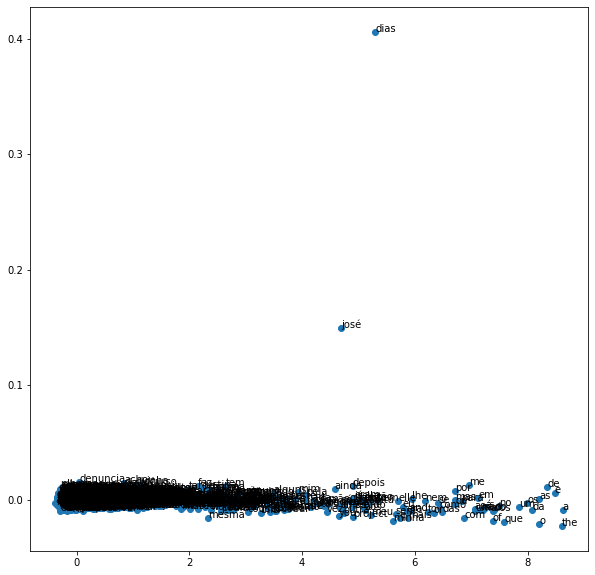

In [ ]:
plt.figure(figsize=(10, 10))

vocab = modelo1.wv.vocab
pca = PCA(n_components=2)
my_pca = pca.fit_transform(modelo1[vocab])
plt.scatter(my_pca[:,0],my_pca[:,1])
for i,word in enumerate(vocab):
  plt.annotate(word, xy=(my_pca[i,0],my_pca[i,1]))
plt.show()

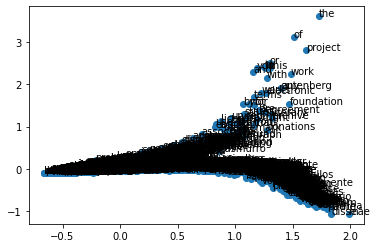

In [ ]:
vocab = modelo2.wv.vocab
pca = PCA(n_components=2)
my_pca = pca.fit_transform(modelo2[vocab])
plt.scatter(my_pca[:,0],my_pca[:,1])
for i,word in enumerate(vocab):
  plt.annotate(word, xy=(my_pca[i,0],my_pca[i,1]))
plt.show()

# Dúvidas?


# Pratica

Baixe um texto de sua preferência e usando o código acima faça um word embbeding e teste várias analises. Não precisa plotar um gráfico.
